### Name - Rajesh Pabba
### ID       - 0768784

# Tours & Travels Customer Churn Prediction

### Importing Libraries

In [1]:
import pandas as pd                                                                         # Importing pandas as pd
import numpy as np                        
from sklearn.model_selection import train_test_split                    # Importing train_test_split from sklearn
from sklearn.ensemble import RandomForestClassifier                      # Importing RandomForestRegressor from sklearn# Importing numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from rfpimp import *                                                                        # Importing rfpimp to get the importances of features
import matplotlib.pyplot as plt

In [2]:
def sniff_modified(df):                                              # User defined function used to show some details of data 
    with pd.option_context("display.max_colwidth", 20):              # Limiting the column width for display
        info = pd.DataFrame()                                        # Creating a dataframe named info
        info['data type'] = df.dtypes                                # Adding column data type which has the datatypes of features
        info['percent missing'] = df.isnull().sum()*100/len(df)      # Adding column percent missing which has the percentage of missing data
        info['No. unique'] = df.apply(lambda x: len(x.unique()))     # Adding column No. unique which gives the number of unique values of features
        info['unique values'] = df.apply(lambda x: x.unique())       # Adding column unique values which has the unique values of features
        return info.sort_values('data type')                         # Soring values wrt to datatype

### Reading Data

In [3]:
data = pd.read_csv('Customertravel.csv')

In [4]:
data.head()            # Displaying the first five rows using head function

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
data.shape                                                             # Gives number of rows and columns

(954, 7)

In [6]:
data.info(verbose=True,show_counts=True)                                 # Gives the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


### Exploratory Data Analysis

In [7]:
data.describe()                                                    # Gives Descriptive Statistics of the numeric columns of data

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


AnnualIncomeClass
High Income      159
Low Income       386
Middle Income    409
dtype: int64


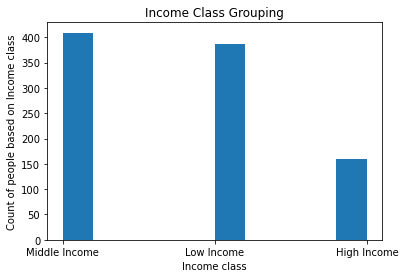

In [8]:
income = data.groupby("AnnualIncomeClass").size()
print(income)
plt.hist(data.AnnualIncomeClass)
plt.ylabel("Count of people based on Income class")
plt.xlabel("Income class")
plt.title("Income Class Grouping");

The above charts represents the income class of customers in our data. About 85% of customers belongs to Low and Middle Income class.

(array([ 62.,   0.,  71.,   0.,   0.,  70.,   0.,   0., 236.,   0., 103.,
          0.,   0.,   0.,   0.,   0.,  29.,   0.,   0., 107.,   0.,  52.,
          0.,   0.,  67.,   0.,   0., 126.,   0.,  31.]),
 array([27.        , 27.36666667, 27.73333333, 28.1       , 28.46666667,
        28.83333333, 29.2       , 29.56666667, 29.93333333, 30.3       ,
        30.66666667, 31.03333333, 31.4       , 31.76666667, 32.13333333,
        32.5       , 32.86666667, 33.23333333, 33.6       , 33.96666667,
        34.33333333, 34.7       , 35.06666667, 35.43333333, 35.8       ,
        36.16666667, 36.53333333, 36.9       , 37.26666667, 37.63333333,
        38.        ]),
 <BarContainer object of 30 artists>)

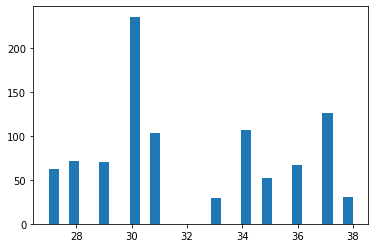

In [9]:
plt.hist(data.Age,bins = 30)

Most of customers in the data are of middle age group ranging from 27 year to 38 years.

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64


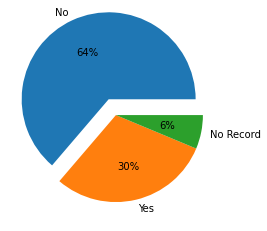

In [10]:
print(data.FrequentFlyer.value_counts())
mylabels = ["No", "Yes", "No Record"]
myexplode = [0.2, 0, 0]

plt.pie(data.FrequentFlyer.value_counts(), labels = mylabels, explode = myexplode, autopct='%1.0f%%')
plt.show() 

Most of the customers are Frequent flyers with the Tours and Travels. We have 60% of new customers in the given data.

#### Target over Age

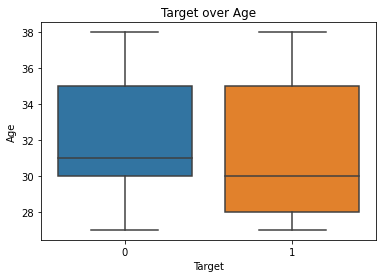

In [11]:
sns.boxplot(data = data, x = 'Target', y = 'Age')
plt.title("Target over Age")
plt.show()

Most of the churned customers fall under age group of 28 to 35 years.

#### Target over Accounts synced with Social Media 

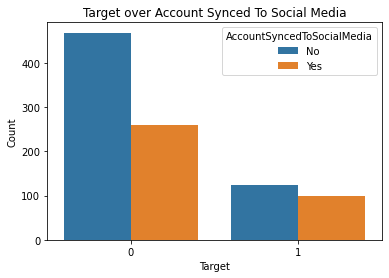

In [12]:
x = data.groupby(['Target','AccountSyncedToSocialMedia']).size().reset_index(name = 'Count')
sns.barplot(x = 'Target', y = 'Count', hue = 'AccountSyncedToSocialMedia', data = x)
plt.title("Target over Account Synced To Social Media")
plt.show()

Customers whose account is not linked with any social media platform churned more.

#### Target over Income class of customers

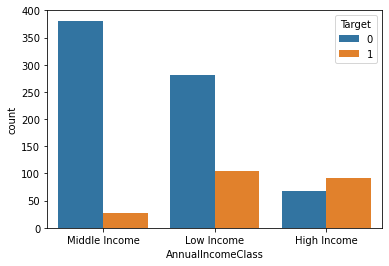

In [13]:
sns.countplot(data=data,x='AnnualIncomeClass',hue='Target')
plt.show()

From the above plot we can observe that, customers who belongs to low income and high income class churned more compared to Middle income class.

#### Target over Services opted

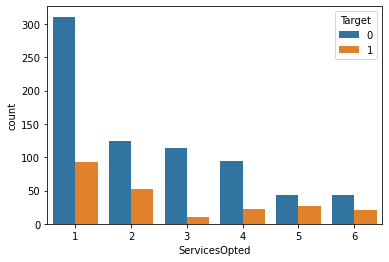

In [14]:
sns.countplot(data=data,x='ServicesOpted',hue='Target')
plt.show()

Customers with more less number of services opted are more compared to customers who opted more services

### Correlation Matrix of Features

Target           1.000000
ServicesOpted    0.038646
Age             -0.131534
Name: Target, dtype: float64


<AxesSubplot:>

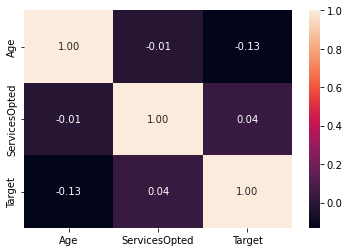

In [15]:
Data_Correlation=data.corr()
print(Data_Correlation["Target"].sort_values(ascending=False))
sns.heatmap(Data_Correlation,annot=True, fmt='1.2f')

## Building Predictive Models

### Data Cleaning

In [16]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [17]:
sniff_modified(data)

,data type,percent missing,No. unique,unique values
Age,int64,0.0,11,"[34, 37, 30, 27, 36, 28, 35, 31, 38, 33, 29]"
ServicesOpted,int64,0.0,6,"[6, 5, 3, 2, 1, 4]"
Target,int64,0.0,2,"[0, 1]"
FrequentFlyer,object,0.0,3,"[No, Yes, No Record]"
AnnualIncomeClass,object,0.0,3,"[Middle Income, Low Income, High Income]"
AccountSyncedToSocialMedia,object,0.0,2,"[No, Yes]"
BookedHotelOrNot,object,0.0,2,"[Yes, No]"


We have 4 categorical features. Only FrequentFlyer feature has missing records which needs to be handled. We need to convert other categorical feature to numerical features to train the model.

In [18]:
data['FrequentFlyer'] = data['FrequentFlyer'].replace('No Record', np.nan) 

We have replaced the missing records with nan values

In [19]:
data.shape           # checking the shape of data

(954, 7)

In [20]:
data = data.dropna()

We have dropped the records with nan values using dropna() method.

In [21]:
data.shape

(894, 7)

After removing records with null values the shape of the data is 894 rows.

In [22]:
sniff_modified(data)

,data type,percent missing,No. unique,unique values
Age,int64,0.0,11,"[34, 37, 30, 27, 36, 28, 31, 38, 33, 35, 29]"
ServicesOpted,int64,0.0,6,"[6, 5, 3, 2, 1, 4]"
Target,int64,0.0,2,"[0, 1]"
FrequentFlyer,object,0.0,2,"[No, Yes]"
AnnualIncomeClass,object,0.0,3,"[Middle Income, Low Income, High Income]"
AccountSyncedToSocialMedia,object,0.0,2,"[No, Yes]"
BookedHotelOrNot,object,0.0,2,"[Yes, No]"


Now there are no missing values in the data

In [23]:
import category_encoders as ce                                                                                                                                                                                   # Importing category encoders as ce            

encoder = ce.OrdinalEncoder(mapping=[{'col': 'FrequentFlyer', 'mapping': {'Yes': 1, 'No': 0}},
                                     {'col': 'AccountSyncedToSocialMedia', 'mapping': {'Yes': 1, 'No': 0}},  
                                     {'col': 'BookedHotelOrNot', 'mapping': {'Yes': 1, 'No': 0}},  
                                     {'col':'AnnualIncomeClass', 'mapping':{'Low Income':1,'Middle Income':2,'High Income':3}}])
                                            
                                                         # Instantiate the ordinal encoder by mapping the column that needs to be converted into numbers   
encoder.fit(data)                 # Fits the data to the encoder
data = encoder.transform(data)    # Transforms the data to dataframe

Doing ordinal encoding on the categorical columns and converting them into numerical features.

In [24]:
sniff_modified(data)

,data type,percent missing,No. unique,unique values
FrequentFlyer,int32,0.0,2,"[0, 1]"
AnnualIncomeClass,int32,0.0,3,"[2, 1, 3]"
AccountSyncedToSocialMedia,int32,0.0,2,"[0, 1]"
BookedHotelOrNot,int32,0.0,2,"[1, 0]"
Age,int64,0.0,11,"[34, 37, 30, 27, 36, 28, 31, 38, 33, 35, 29]"
ServicesOpted,int64,0.0,6,"[6, 5, 3, 2, 1, 4]"
Target,int64,0.0,2,"[0, 1]"


We could see that there are only numerical features in the data.

Target                        1.000000
FrequentFlyer                 0.436410
AnnualIncomeClass             0.148727
AccountSyncedToSocialMedia    0.078608
ServicesOpted                 0.045770
Age                          -0.136133
BookedHotelOrNot             -0.208839
Name: Target, dtype: float64


<AxesSubplot:>

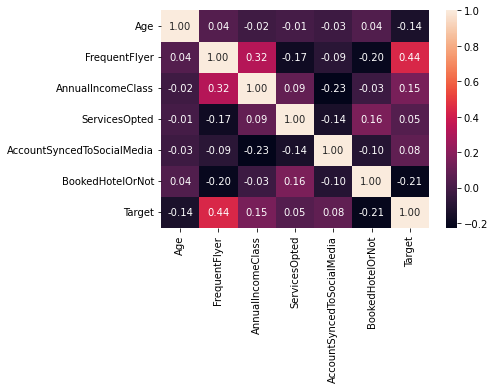

In [25]:
Correlation_Matrix=data.corr()
print(Correlation_Matrix["Target"].sort_values(ascending=False))
sns.heatmap(Correlation_Matrix,annot=True, fmt='1.2f')

'FrequentFlyer' feature has the highest correlation with Target variable and 'Age' and 'Booked hotel or not' feature have negative correlation with Target variable.

In [26]:
X = data.drop("Target",axis=1)               # Dropping Target column from the features for training data
y = data["Target"]                           # Taking target variable as testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)
                          # Splitting data to train and test data with 80% for training and 20% for testing the model

In [28]:
data.shape                                  # Checking shape of actual data

(894, 7)

In [29]:
X_train.shape                               # 80% of data is in X_train

(715, 6)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
def lr_model():
  lr = LogisticRegression()
  print_model_output(lr) 

## Support Vector Machine

In [31]:
from sklearn.svm import SVC
def svc_model(kernal):
  svm_classifier = SVC(kernel=kernal)
  print_model_output(svm_classifier) 


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

def rf_model(rand_state,estimators):
  rfc = RandomForestClassifier(random_state=rand_state,n_estimators=estimators)
  print_model_output(rfc) 


In [33]:
from rfpimp import * 

def showimp(rf, X, y):                                                # Function used to show the feature importances
    features = list(X.columns)                                        # Takes the list of all columns into the features
    I = importances(rf, X, y, features=features)                      # Function that is used to show the importances of the features
    plot_importances(I, color='#4575b4')                              # Plots the feature importances

In [34]:
from sklearn.metrics import confusion_matrix      
                                                               # Function that is used to print the confusion matrix
def conf_matrix_plot(cm):
  df_cm = pd.DataFrame(cm, range(2),range(2))
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})


In [35]:
def print_model_output(model):
  model.fit(X_train,Y_train)                                                         # Fitting the data to the model
  y_pred = model.predict(X_test)                                                     # Predicting the values
  print("--------------------------------------------")
  print("Mean Absolute Error (MAE): ",metrics.mean_absolute_error(Y_test, y_pred))   # Mean Absolute Error
  print("--------------------------------------------")
  print("Confusion Matrix : ")
  cm = confusion_matrix(Y_test,y_pred)                                               # Printing Confusion matrix
  print(cm)
  conf_matrix_plot(cm) 
  print("--------------------------------------------")
  print("Accuracy: ",accuracy_score(Y_test,y_pred))                                  # Accuracy of the model
  print("Precision: ",precision_score(Y_test,y_pred))                                # Precision score of the models
  print("--------------------------------------------")
  print(" Feature Importances")
  showimp(model, X, y)                                                               # Feature Importances


--------------------------------------------
Mean Absolute Error (MAE):  0.18435754189944134
--------------------------------------------
Confusion Matrix : 
[[131  16]
 [ 17  15]]
--------------------------------------------
Accuracy:  0.8156424581005587
Precision:  0.4838709677419355
--------------------------------------------
 Feature Importances


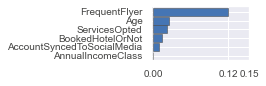

In [36]:
lr_model()                            # Calling an instance of the Linear Regression Model

--------------------------------------------
Mean Absolute Error (MAE):  0.1787709497206704
--------------------------------------------
Confusion Matrix : 
[[147   0]
 [ 32   0]]
--------------------------------------------
Accuracy:  0.8212290502793296
Precision:  0.0
--------------------------------------------
 Feature Importances


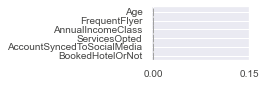

In [37]:
svc_model('sigmoid')                 # Calling an instance of the SVC model with activation function as sigmoid

--------------------------------------------
Mean Absolute Error (MAE):  0.1340782122905028
--------------------------------------------
Confusion Matrix : 
[[134  13]
 [ 11  21]]
--------------------------------------------
Accuracy:  0.8659217877094972
Precision:  0.6176470588235294
--------------------------------------------
 Feature Importances


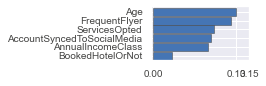

In [38]:
rf_model(151,100)                # Calling an instance of the Random Forest Classifier Model with 100 decision trees and random sate is defined.

### Model and Accuracy

<table>
<tr>
<th>Model</th>
<th>Accuracy</th>
</tr>
<tr>
<td>Logistic Regression</td>
<td>0.81</td>
</tr>

<tr>
<td>Support Vector Machine SVM Model</td>
<td>0.82</td>

</tr>
    
<tr>
<td>Random Forest Model</td>
<td>0.87</td>

</tr>


</table>

From the analysis we have observed Random Forest Classifier model is performing well.

## Recommendations

-> Churn and age(27 to 28) have a positive correlation, indicating that younger people are more likely to churn.

-> Churn and frequent flight have a positive correlation. 

-> Middle-income people have a negative correlation with churn, low-income people and high income class have a positive correlation with churn. We should consider providing deals, discounts and low reasonable prices for the low income people. On the other hand, we need to take feedback from the high income class customer and provide them with premium services based on their feedback

-> Customers with more less number of services opted churned more compared to customers who opted more services. We need to consider providing services to all income class customers which helps in reducing the churn.

-> Both positive and negative aspects of account syncing to social media and churn are present. It implies that both parties use social media.

**As a result, in order to avoid churn, We must pay special attention to persons between the ages of 27 and 28, who fly frequently, who have chosen less services in recent years, who have a high income.**
